In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

In [3]:
df = pd.read_csv("data/black_friday_dataset.csv")

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df = df.drop(['User_ID','Product_ID'], axis=1)

In [8]:
for col in df.columns:
    print(f"Column Name: {col}, \nNull Values: {df[col].isnull().sum()}\n")

Column Name: Gender, 
Null Values: 0

Column Name: Age, 
Null Values: 0

Column Name: Occupation, 
Null Values: 0

Column Name: City_Category, 
Null Values: 0

Column Name: Stay_In_Current_City_Years, 
Null Values: 0

Column Name: Marital_Status, 
Null Values: 0

Column Name: Product_Category_1, 
Null Values: 0

Column Name: Product_Category_2, 
Null Values: 173638

Column Name: Product_Category_3, 
Null Values: 383247

Column Name: Purchase, 
Null Values: 0



In [9]:
[col for col in df.columns]

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [10]:
def substitue_values(data, col_name):
    # Get observed values and counts
    observed_vals = df[col_name].dropna().unique()
    counts = df[col_name].value_counts()

    # Define an imputation distribution
    impute_dist = {
        counts.index[-1]: 0.3, 
        counts.index[-2]: 0.2,
        counts.index[-3]: 0.2,
        counts.index[-4]: 0.1,
        counts.index[-5]: 0.1,
        counts.index[-6]: 0.1
    }

    # Function to draw sample from distribution
    def draw_val(dist):
        val = np.random.choice(list(dist.keys()), p=list(dist.values()))
        return val

    # Fill each missing value by drawing from distribution
    for idx in df[df[col_name].isna()].index:
        df.loc[idx,col_name] = draw_val(impute_dist)

In [11]:
substitue_values(df, 'Product_Category_2')

In [12]:
substitue_values(df, 'Product_Category_3')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [14]:
# ----------------------------------
# cleaning `Purchase` column

In [15]:
new_df = pd.DataFrame()

<Axes: xlabel='Age', ylabel='Purchase'>

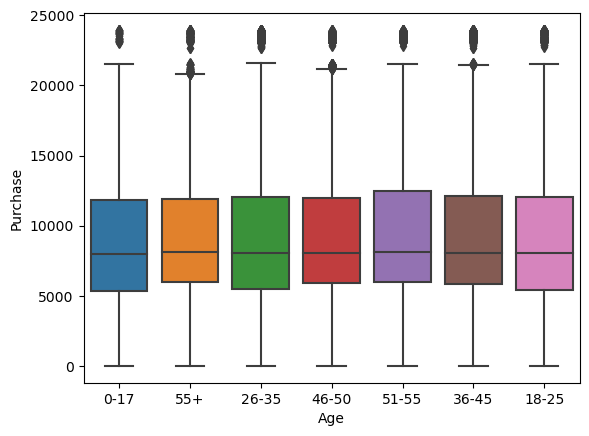

In [16]:
sns.boxplot(data=df, x='Age', y='Purchase')

In [17]:
# Calculate IQR and bounds for each age group  
groups = df.groupby('Age')
Q1 = groups['Purchase'].transform('quantile',0.25)
Q3 = groups['Purchase'].transform('quantile',0.75) 
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Filter within bounds for each group
df = df[df.apply(lambda x: lower[x.name] < x['Purchase'] < upper[x.name], axis=1)]

In [18]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,18.0,18.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,18.0,4.0,1422
3,F,0-17,10,A,2,0,12,14.0,10.0,1057
4,M,55+,16,C,4+,0,8,7.0,11.0,7969


In [19]:
# Custom Encoding

- 'Gender'
- 'Age'
- 'Occupation'
- 'City_Category'
- 'Stay_In_Current_City_Years'
- 'Marital_Status'
- 'Product_Category_1'
- 'Product_Category_2'
- 'Product_Category_3'
- 'Purchase'

In [20]:
# -------------------------------------------
# defining funciton to perform label encoding

def custom_label_encoder(col, dictionary):
    df[col] = df[col].map(dictionary)

In [21]:
custom_label_encoder('Gender', {'F': 'Female', 'M': 'Male'})

In [22]:
custom_label_encoder('Stay_In_Current_City_Years', {'0': 0, '1': 1, '2': 2, '3': 3, '4+': '3+'})

In [23]:
custom_label_encoder('Marital_Status', {0: 'Unmarried', 1: 'Married'})

In [24]:
custom_label_encoder('Product_Category_2', {2.0: 1, 3.0: 2, 4.0: 3, 5.0: 4, 6.0: 5, 7.0: 6, 8.0: 7, 9.0: 8, 10.0: 9, 11.0: 10, 12.0: 11, 13.0: 12, 14.0: 13, 15.0: 14, 16.0: 15, 17.0: 16, 18.0: 17})

In [25]:
custom_label_encoder('Product_Category_3', {3.0: 1, 4.0: 2, 5.0: 3, 6.0: 4, 8.0: 5, 9.0: 6, 10.0: 7, 11.0: 8, 12.0: 9, 13.0: 10, 14.0: 11, 15.0: 12, 16.0: 13, 17.0: 14, 18.0: 15})

In [26]:
# ----------------------------------

In [27]:
# ----------------------------------
# Data Visualizations

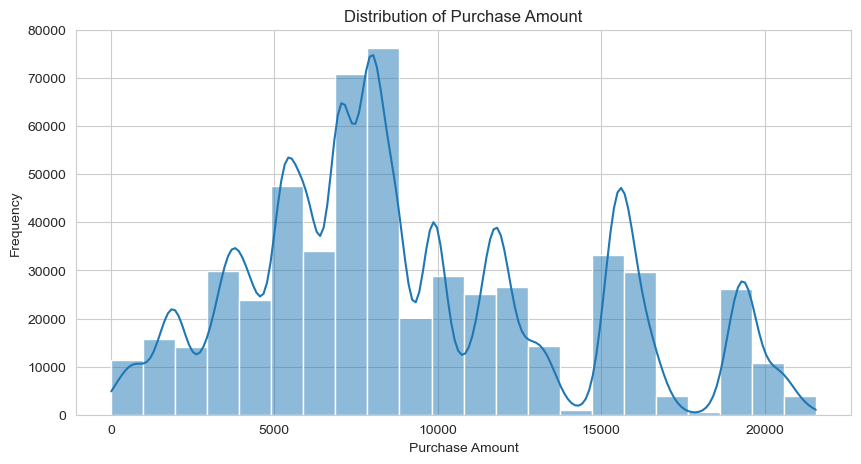

In [90]:
# Visualization 1: Distribution of Purchase Amount

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(df['Purchase'], bins=22,kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

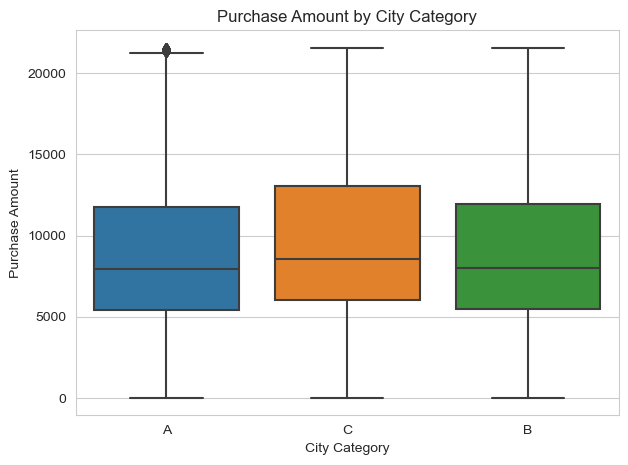

In [91]:
# Visualization 2: Purchase Amount by City Category

sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.boxplot(x='City_Category', y='Purchase', data=df)
plt.title('Purchase Amount by City Category')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.show()

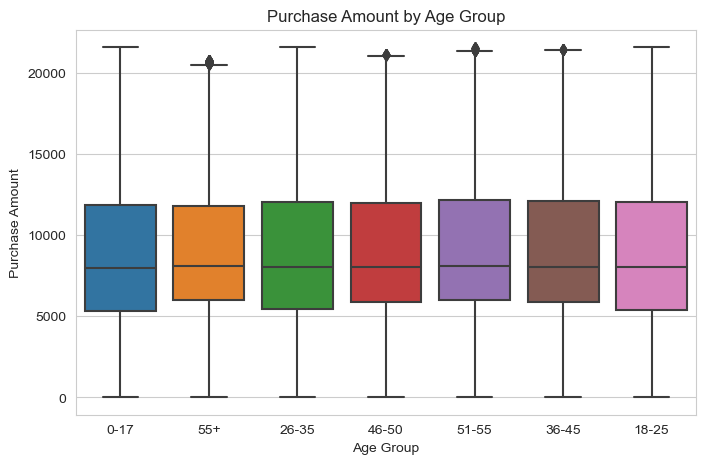

In [92]:
# Visualization 3: Purchase Amount by Age Group

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()

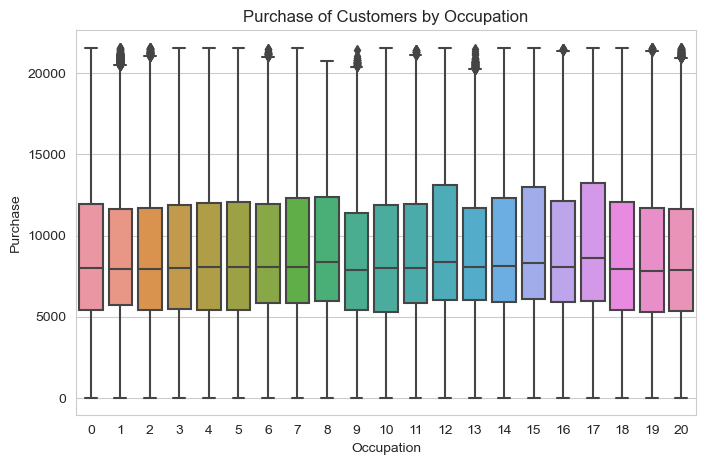

In [93]:
# Visualization 4: Purchase of Customers by Occupation

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='Occupation', y='Purchase',data=df)
plt.title('Purchase of Customers by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.show()

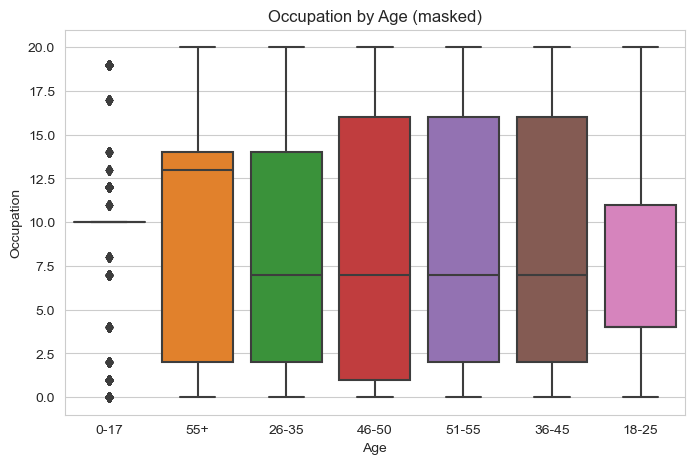

In [94]:
# Visualization 5: Occupation by Age (masked)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='Age', y='Occupation', data=df)
plt.title('Occupation by Age (masked)')
plt.ylabel('Occupation')
plt.xlabel('Age')
plt.show()

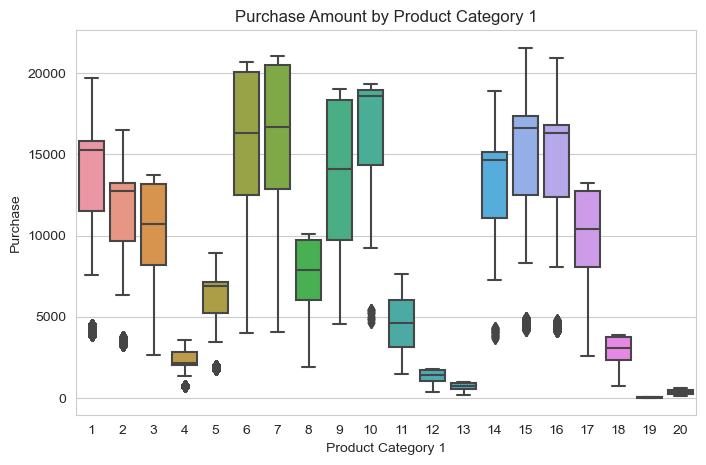

In [95]:
# Visualization 6: Purchase Amount by Product Category 1 (masked)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='Product_Category_1', y='Purchase', data=df)
plt.title('Purchase Amount by Product Category 1')
plt.xlabel('Product Category 1')
plt.ylabel('Purchase')
plt.show()

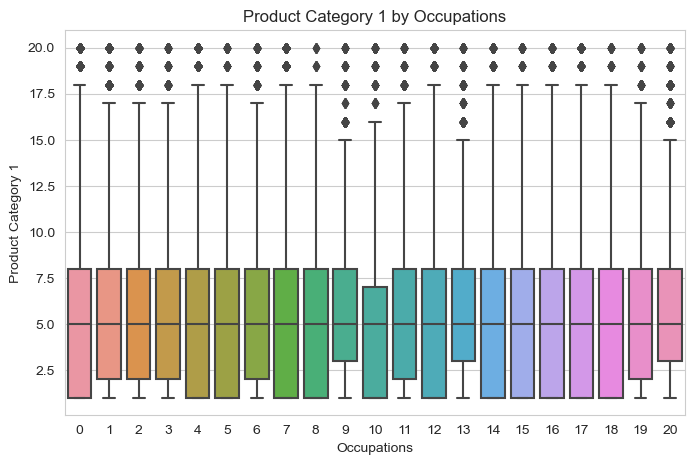

In [96]:
# Visualization 7: Purchase Amount by Product Category 1 (masked)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='Occupation', y='Product_Category_1', data=df)
plt.title('Product Category 1 by Occupations')
plt.xlabel('Occupations')
plt.ylabel('Product Category 1')
plt.show()

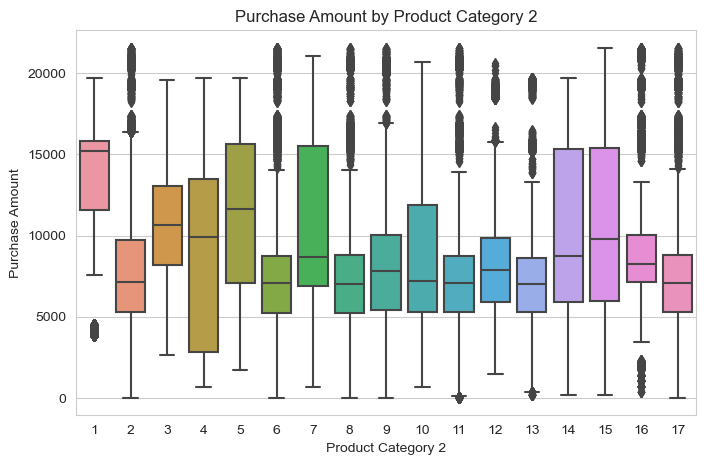

In [97]:
# Visualization 8: Purchase Amount by Product Category 2 (masked)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='Product_Category_2', y='Purchase', data=df)
plt.title('Purchase Amount by Product Category 2')
plt.xlabel('Product Category 2')
plt.ylabel('Purchase Amount')
plt.show()

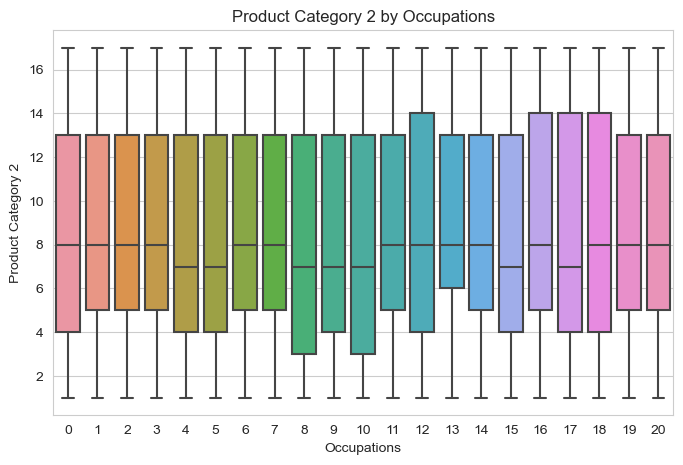

In [98]:
# Visualization 9: Purchase Amount by Product Category 2 (masked)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='Occupation', y='Product_Category_2', data=df)
plt.title('Product Category 2 by Occupations')
plt.xlabel('Occupations')
plt.ylabel('Product Category 2')
plt.show()

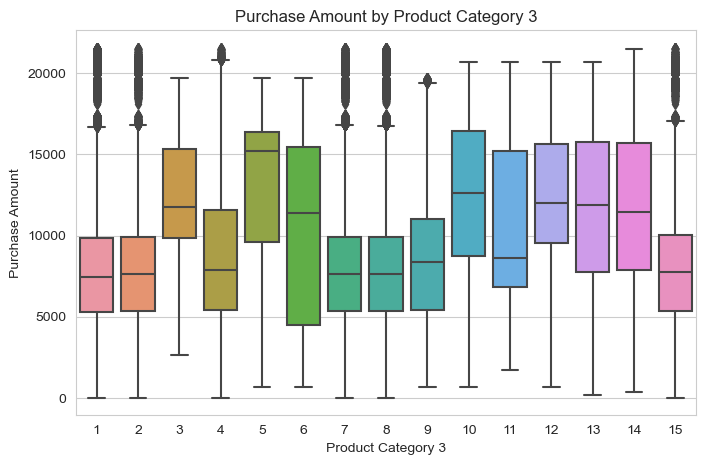

In [99]:
# Visualization 10: Purchase Amount by Product Category 3 (masked)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='Product_Category_3', y='Purchase', data=df)
plt.title('Purchase Amount by Product Category 3')
plt.xlabel('Product Category 3')
plt.ylabel('Purchase Amount')
plt.show()

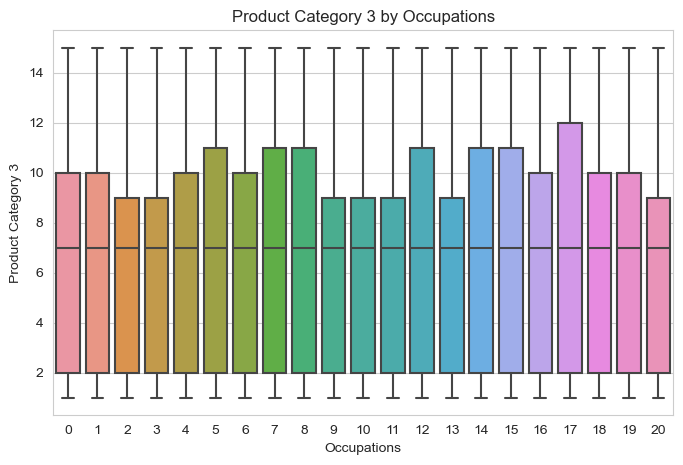

In [100]:
# Visualization 11: Purchase Amount by Product Category 3 (masked)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='Occupation', y='Product_Category_3', data=df)
plt.title('Product Category 3 by Occupations')
plt.xlabel('Occupations')
plt.ylabel('Product Category 3')
plt.show()

In [101]:
df.to_csv('black_friday_dataset_cleaned.csv', index=False)